
### Universidade Federal do Pará
### Programa pós Graduação Engenharia Elétrica
### Redes Neurais Artificiais


**Professora:** Prof. Dra. Adriana Castro

**Discentes:** Luan Santa (201900470003), Romário Silva (202000470023)

## TODO

 - [ ] Adicionar gráfico de treinamento x saída desejada da rede mlp
 - [X] Coletar informações sobre o dataset: Adicionado na seção
 - [X] np.random.randn - verificar se distribuição é normal: https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html
 - [X] train_test_split -  verificar a taxa de separação: por padrão, a função define 25% dos dados para teste. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
 - [ ] batch_size - verificar se é valido = 1
 - [ ] Simplificar métricas coletadas

Ambiente de Desenvolvimento
---

Aqui é feita a configuração do ambiente de desenvolvimento. Onde os warning estão sendo desativados.

In [1]:
!pip install ipynb
import warnings
warnings.filterwarnings('ignore')
from IPython import display

## Aplicação

Todas as bibliotecas necessárias a aplicação serão carregadas no sistema.

In [2]:
# dataset
from sklearn.datasets import load_breast_cancer

# preprocessamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# mlps
from sklearn.neural_network import MLPClassifier
from ipynb.fs.full.lib_ppgee_mlp import *

# Calculo das métricas
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## Carregamento

Os dados utilizado no estudo corresponde ao conjunto de dados utilizados para classificação de câncer de mama no estado de Wisconsin. 

- Classes: 2

- Amostras por classe: 212(Maligno), 357(Benigno)

- Total de Amostras: 569

- Atributos: 30

- Valores: Real e positivo

Disponível no repositório UCI: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [3]:
# carrega o dataset
cancer = load_breast_cancer()

# separa entre entrada(x) e saida(y)
X = cancer['data']
y = cancer['target']

# separa em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Pré-processamento

Nessa etapa foi realiza a padronização de um conjunto de dados utilizado.

In [4]:
# Cria um padronizador
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



## Inicialização das Redes MLP (Scikit learn e PPGEE)

Rede Neural - Scikit Learn

In [5]:
skl_mlp = MLPClassifier(
    activation='logistic', 
    learning_rate_init=0.001, 
    hidden_layer_sizes=(30),
    batch_size=1)
skl_mlp.fit(X_train,y_train)


MLPClassifier(activation='logistic', batch_size=1, hidden_layer_sizes=30)

Rede Neural - PPGEE

In [6]:
# Adaptando a entrada e saída a nossa biblioteca
X = X_train
y = np.array([[c] for c in y_train])

# Configuracao da rede
layers = [30,30,1]
epochs = 1000        
eta = 0.001

# Criacao do objeto e treinamento
ppgee_mlp = Neural_Network(layers=layers, epochs=epochs, eta=eta)
ppgee_mlp.train(X, y)

## Resultados



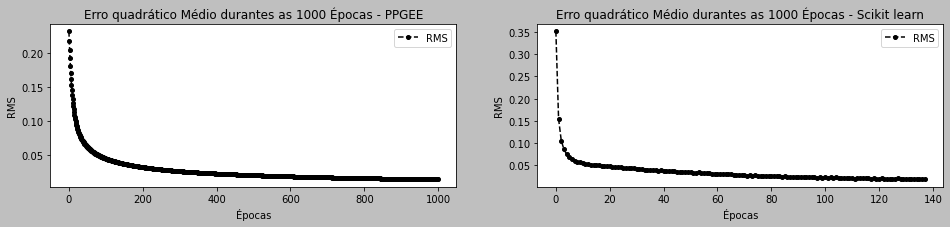

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16,3))

ax[0].set_title(f"Erro quadrático Médio durantes as {epochs} Épocas - PPGEE")
ax[0].set_xlabel("Épocas")
ax[0].set_ylabel("RMS")
ax[0].plot(ppgee_mlp.get_rms(), linestyle='--', marker='o', markersize = 4)
ax[0].legend(['RMS'])

ax[1].set_title(f"Erro quadrático Médio durantes as {epochs} Épocas - Scikit learn")
ax[1].set_xlabel("Épocas")
ax[1].set_ylabel("RMS")
ax[1].plot(skl_mlp.loss_curve_, linestyle='--', marker='o', markersize = 4)
ax[1].legend(['RMS'])

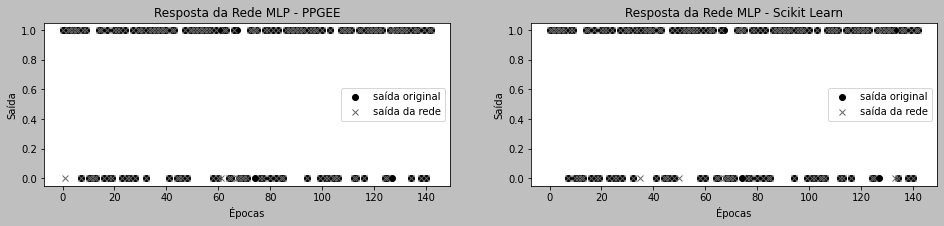

In [8]:
ppgee_predictions = np.round(ppgee_mlp.forward(X_test))
skl_predictions = skl_mlp.predict(X_test)

fig, ax = plt.subplots(1, 2, figsize=(16,3))
ax[0].plot(y_test, 'o', label="saída original")
ax[0].set_title("Resposta da Rede MLP - PPGEE")
ax[0].set_xlabel("Épocas")
ax[0].set_ylabel("Saída")
ax[0].plot(ppgee_predictions, 'x',  label='saída da rede')
ax[0].legend()

ax[1].plot(y_test, 'o', label="saída original")
ax[1].set_title("Resposta da Rede MLP - Scikit Learn")
ax[1].set_xlabel("Épocas")
ax[1].set_ylabel("Saída")
ax[1].plot(skl_predictions, 'x',  label='saída da rede')
ax[1].legend()

In [9]:
print(confusion_matrix(y_test,skl_predictions))
print(classification_report(y_test,skl_predictions))

[[47  2]
 [ 4 90]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        49
           1       0.98      0.96      0.97        94

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.95       143
weighted avg       0.96      0.96      0.96       143



In [10]:
print(confusion_matrix(y_test,ppgee_predictions))
print(classification_report(y_test,ppgee_predictions))

[[47  2]
 [ 3 91]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        49
           1       0.98      0.97      0.97        94

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



## Pesos da Rede

Por fim, os pesos atualizados são salvos em dois arquivos:

- Entrada --> Oculta: w1.txt

- Oculta --> Saída: w2.txt

In [11]:
ppgee_mlp.saveWeights()